# Initialize

In [ ]:
# google drive
from google.colab import drive
drive.mount('./mount')
import jieba
import jieba.analyse

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# !pip install jieba
# !pip install matplotlib


font

In [ ]:

# 安装中文字体
# !apt-get -y install fonts-wqy-microhei

# # 设置中文字体路径
# font_path = '/usr/share/fonts/truetype/wqy/wqy-microhei.ttc'

# # 创建 FontProperties 对象
# font_prop = fm.FontProperties(fname=font_path)

# # 设置全局字体
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei']

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# 上传字体文件
uploaded = files.upload()

# 获取上传的字体文件名
font_filename = next(iter(uploaded))

# 将字体文件复制到Colab环境中
font_dir = '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/'
os.makedirs(font_dir, exist_ok=True)
os.rename(font_filename, os.path.join(font_dir, font_filename))

# 注册字体
fm.fontManager.addfont(os.path.join(font_dir, font_filename))

# 设置全局字体路径
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = [font_filename]

# 绘图
plt.plot([1, 2, 3], label='示例')
plt.legend()
plt.xlabel('X轴')
plt.ylabel('Y轴')
plt.title('示例图表')
plt.show()



file processing

In [ ]:


input_file_path = './mount/My Drive/Colab Notebooks/BH/1-2/DL/1/chinese_corpus/鹿鼎记.txt'
output_file_path = './mount/My Drive/Colab Notebooks/BH/1-2/DL/1/chinese_corpus/鹿鼎记-replaced.txt'

# 读取文本文件
with open(input_file_path, 'rb') as input_file:
    byte_data = input_file.read()

# 使用 'replace' 参数来替换无效字节
decoded_text_replace = byte_data.decode('gbk', errors='ignore')

# 将处理后的文本写入输出文件
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    output_file.write(decoded_text_replace)

print("处理完成，已将结果写入到", output_file_path)


# functions

In [2]:

# file reading function
def read_text(file_path):

    with open(file_path, 'r', encoding='utf-8') as file:
        words = file.read()
    return words


# def word_segmentation(text):
#   # word segmentation on Chinese text using 'jieba.lcut'
#     return jieba.lcut(text)

def isfloat(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

# frequency
def word_frequency(tokens):
    freq_dict = {}
    for token in tokens:
      if len(token) == 1 or token == '\n' or token.isdigit() or isfloat(token) :
        continue
      else:
        if token in freq_dict:
          freq_dict[token] += 1
  # to aviord accessing a key (token) that doesn't exist in the dictionary
        else:
            freq_dict[token] = 1
    return freq_dict

# Draw Distribution



In [3]:

def drawBar(freq_dict,RANGE, heng):
    #函数来源于：https://blog.csdn.net/leokingszx/article/details/101456624，
    # https://blog.csdn.net/weixin_43956523/article/details/134588398,有改动

    #RANGE：截取显示的字典的长度。
    #heng=0，代表条状图的柱子是竖直向上的
    # heng=1，代表柱子是横向的。

    by_value = sorted(freq_dict.items(),key = lambda item:item[1],reverse=True)
    print(by_value[:20])
    x = []
    y = []
    plt.figure(figsize=(9, 6))
    for d in by_value:
        x.append(d[0])
        y.append(d[1])
    if heng == 0:
        plt.bar(x[0:RANGE], y[0:RANGE])
        plt.show()
        return
    elif heng == 1:
        plt.barh(x[0:RANGE], y[0:RANGE])
        plt.show()
        return
    else:
        return "heng的值仅为0或1！"

# Main

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38886 (\N{CJK UNIFIED IDEOGRAPH-97E6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23453 (\N{CJK UNIFIED IDEOGRAPH-5B9D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35828 (\N{CJK UNIFIED IDEOGRAPH-8BF4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36947 (\N{CJK UNIFIED IDEOGRAPH-9053}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

[('韦小宝', 9803), ('说道', 2402), ('什么', 1901), ('皇上', 1566), ('自己', 1465), ('康熙', 1307), ('皇帝', 1153), ('咱们', 1130), ('一个', 1122), ('不是', 1111), ('太后', 1038), ('公主', 978), ('知道', 973), ('他们', 972), ('吴三桂', 956), ('心想', 943), ('教主', 900), ('我们', 895), ('出来', 891), ('一声', 830)]


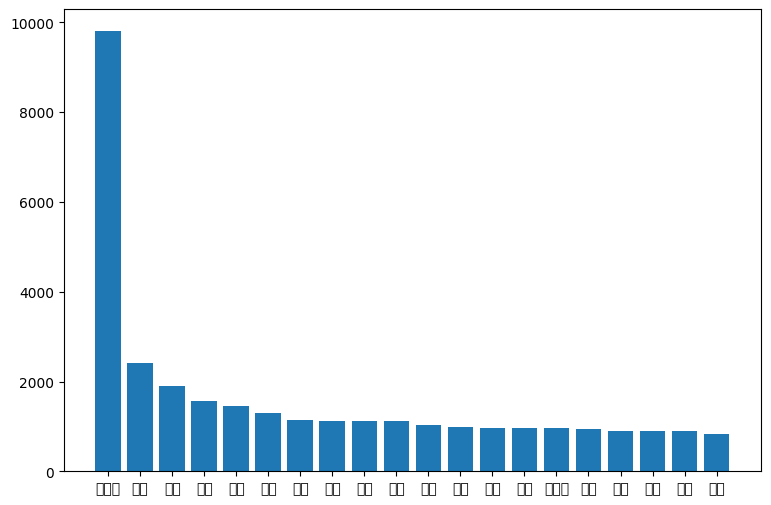

In [14]:

# open file
words = read_text('./mount/My Drive/Colab Notebooks/BH/1-2/DL/1/chinese_corpus/鹿鼎记-replaced.txt')


# segmentation
tokens = jieba.lcut(words)


# frequency analysis
freq_dict = word_frequency(tokens)

# polt
# method1
# plot_distribution(freq_dict)

# method2
drawBar(freq_dict,20, 0)